 Gender classification task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
print(df.describe())


         long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None


In [5]:
#checking  for null values 
null_values = df.isnull()
null_values = null_values.sum()
print(null_values)

#there is no null value in this data

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


In [6]:
#Encoding Categorical Variables:
#converting  'gender' column from categorical (Male/Female) to numerical (0/1).

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df
#This converts 'Male' to 1 and 'Female' to 0.

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [7]:
#Normalize the numerical features to ensure they have a similar scale,to improve the performance (forehead_width_cm	, forehead_height_cm)

from sklearn.preprocessing import StandardScaler

# Identifying columns need normalization
columns_to_normalize = ['forehead_width_cm', 'forehead_height_cm']

scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,1
1,0,0.739389,-1.009418,0,0,1,0,0
2,0,-1.247933,0.653511,1,1,1,1,1
3,0,1.100720,0.283971,0,1,1,1,1
4,1,0.287725,-0.085568,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.378057,-1.563727,0,0,0,0,0
4997,1,-1.157600,-1.009418,0,0,0,0,0
4998,1,-0.254272,-0.455108,0,0,0,0,0
4999,1,0.016726,0.468741,0,0,0,0,0


In [8]:
# Split the data into features and target variable

x = df.drop('gender' , axis = 1)
y = df['gender']
print(x , y)


      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1          -1.247933            0.283971          1          0   
1             0           0.739389           -1.009418          0          0   
2             0          -1.247933            0.653511          1          1   
3             0           1.100720            0.283971          0          1   
4             1           0.287725           -0.085568          0          0   
...         ...                ...                 ...        ...        ...   
4996          1           0.378057           -1.563727          0          0   
4997          1          -1.157600           -1.009418          0          0   
4998          1          -0.254272           -0.455108          0          0   
4999          1           0.016726            0.468741          0          0   
5000          1           2.004048           -1.009418          1          1   

      lips_thin  distance_nose_to_lip_l

In [9]:
#splitting data into training and testing 
#split data into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state = 42)


In [10]:
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100 , random_state = 42)
model.fit(x_train ,y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the testing set
y_pred = model.predict(x_test)

In [12]:
#evaluating model
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[484  18]
 [ 22 477]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       502
           1       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

Accuracy: 0.9600399600399601


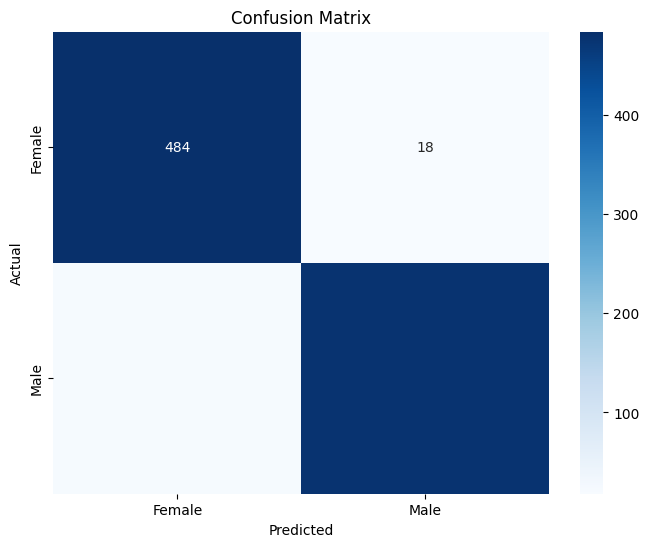

In [13]:

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = label_encoder.classes_, yticklabels = label_encoder.classes_ )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Training and evaluating each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"{name} Performance:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-" * 50)


Logistic Regression Performance:
[[485  17]
 [ 22 477]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

Accuracy: 0.961038961038961
--------------------------------------------------
SVM Performance:
[[495   7]
 [ 25 474]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       502
           1       0.99      0.95      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

Accuracy: 0.968031968031968
--------------------------------------------------
Decision Tree Performance:
[[480  22]
 [ 25 474]]
              precision    recall  f1-scor

gender
0    2501
1    2500
Name: count, dtype: int64


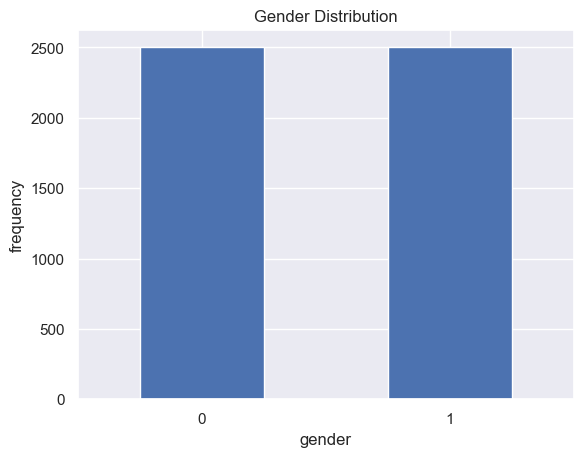

In [63]:
#### For Visualizations
#1- distributions of gender
# Check the distribution of the target variable

gender_counts = df['gender'].value_counts()
print(gender_counts)

gender_counts.plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("gender")
plt.ylabel("frequency")
plt.xticks(rotation=0)
plt.show()

#data is balanced

<Figure size 1000x800 with 0 Axes>

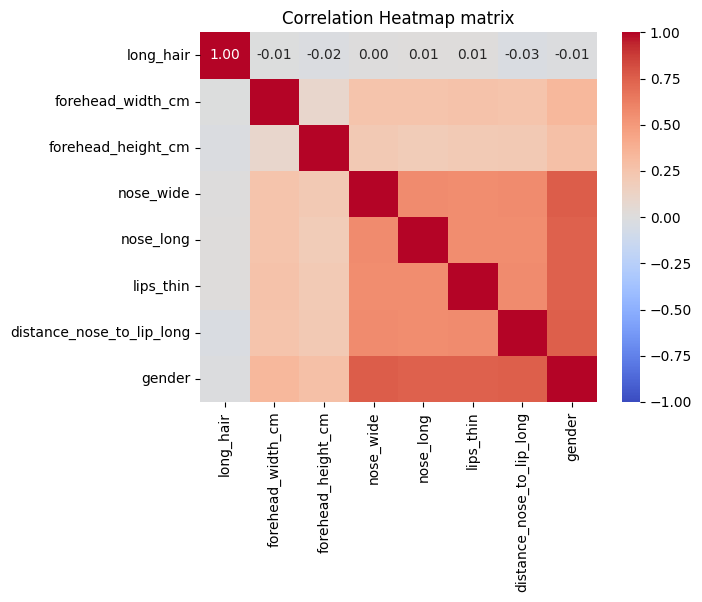

In [52]:
#2- correlation matrix of the data
corr_matrix = df.corr()
plt.figure(figsize=(10 ,8))
plt.show()

sns.heatmap(corr_matrix , annot = True, cmap = 'coolwarm' , fmt='.2f', vmax = 1 , vmin = -1 )
plt.title("Correlation Heatmap matrix")
plt.show()

c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


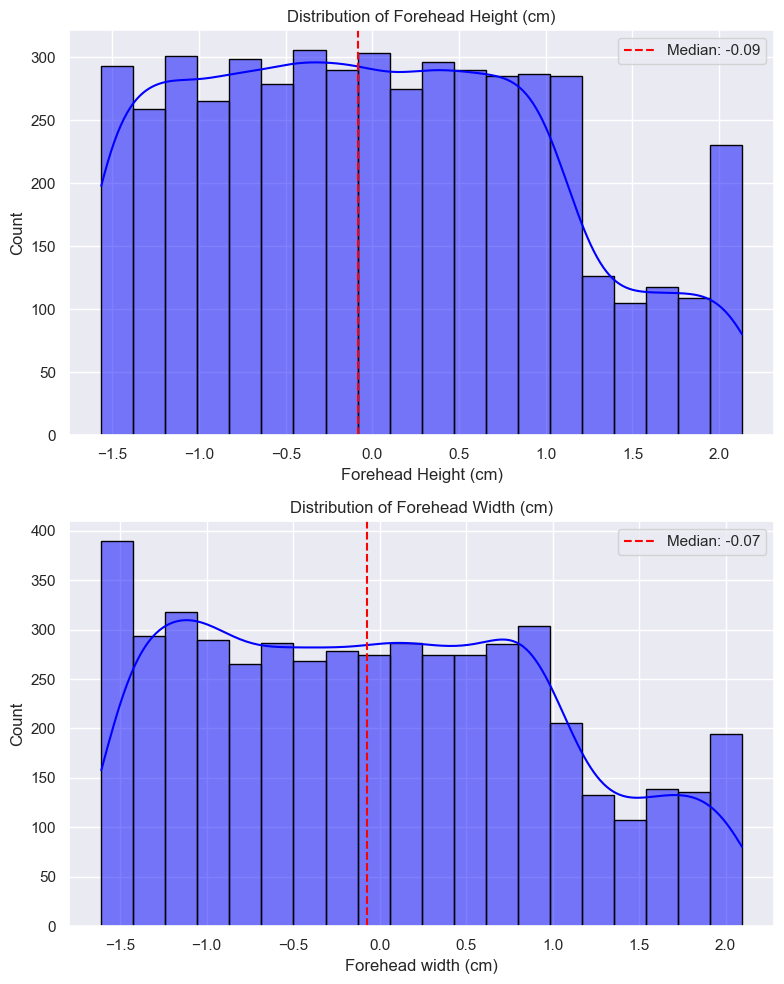

In [74]:
#create subplots for histograms
#plt.hist(df['forehead_height_cm'] , edgecolor='black' , bins=10)
#plt.show()
fig , axes = plt.subplots(2 , 1 , figsize=(8 , 10))

#plot histogram for  forehead_width_cm and forehead_height_cm with median
sns.histplot(df['forehead_height_cm'] , kde=True , ax=axes[0] ,edgecolor='black' , color='blue')

median_value = df['forehead_height_cm'].median()
axes[0].axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
axes[0].set_title('Distribution of Forehead Height (cm)')
axes[0].set_xlabel('Forehead Height (cm)')
axes[0].legend()

sns.histplot(df['forehead_width_cm'] , kde=True , ax=axes[1], edgecolor='black' , color='blue')

median_value = df['forehead_width_cm'].median()
axes[1].axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
axes[1].set_title('Distribution of Forehead Width (cm)')
axes[1].set_xlabel('Forehead width (cm)')
axes[1].legend()


# Adjust layout
plt.tight_layout()
plt.show()



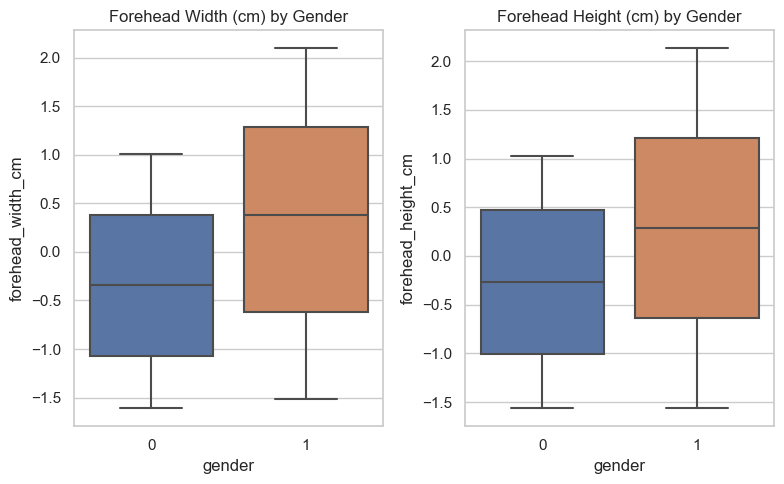

In [55]:
# Plot box plots to compare the distributions of forehead_width_cm and forehead_height_cm by gender
fig , axes = plt.subplots(1 , 2 , figsize=(8 , 5))

sns.set_theme(style="whitegrid")
sns.boxplot(x='gender', y='forehead_width_cm', data=df, ax=axes[0])
axes[0].set_title('Forehead Width (cm) by Gender')

sns.boxplot(x='gender', y='forehead_height_cm', data=df, ax=axes[1])
axes[1].set_title('Forehead Height (cm) by Gender')

plt.tight_layout()
plt.show()

c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

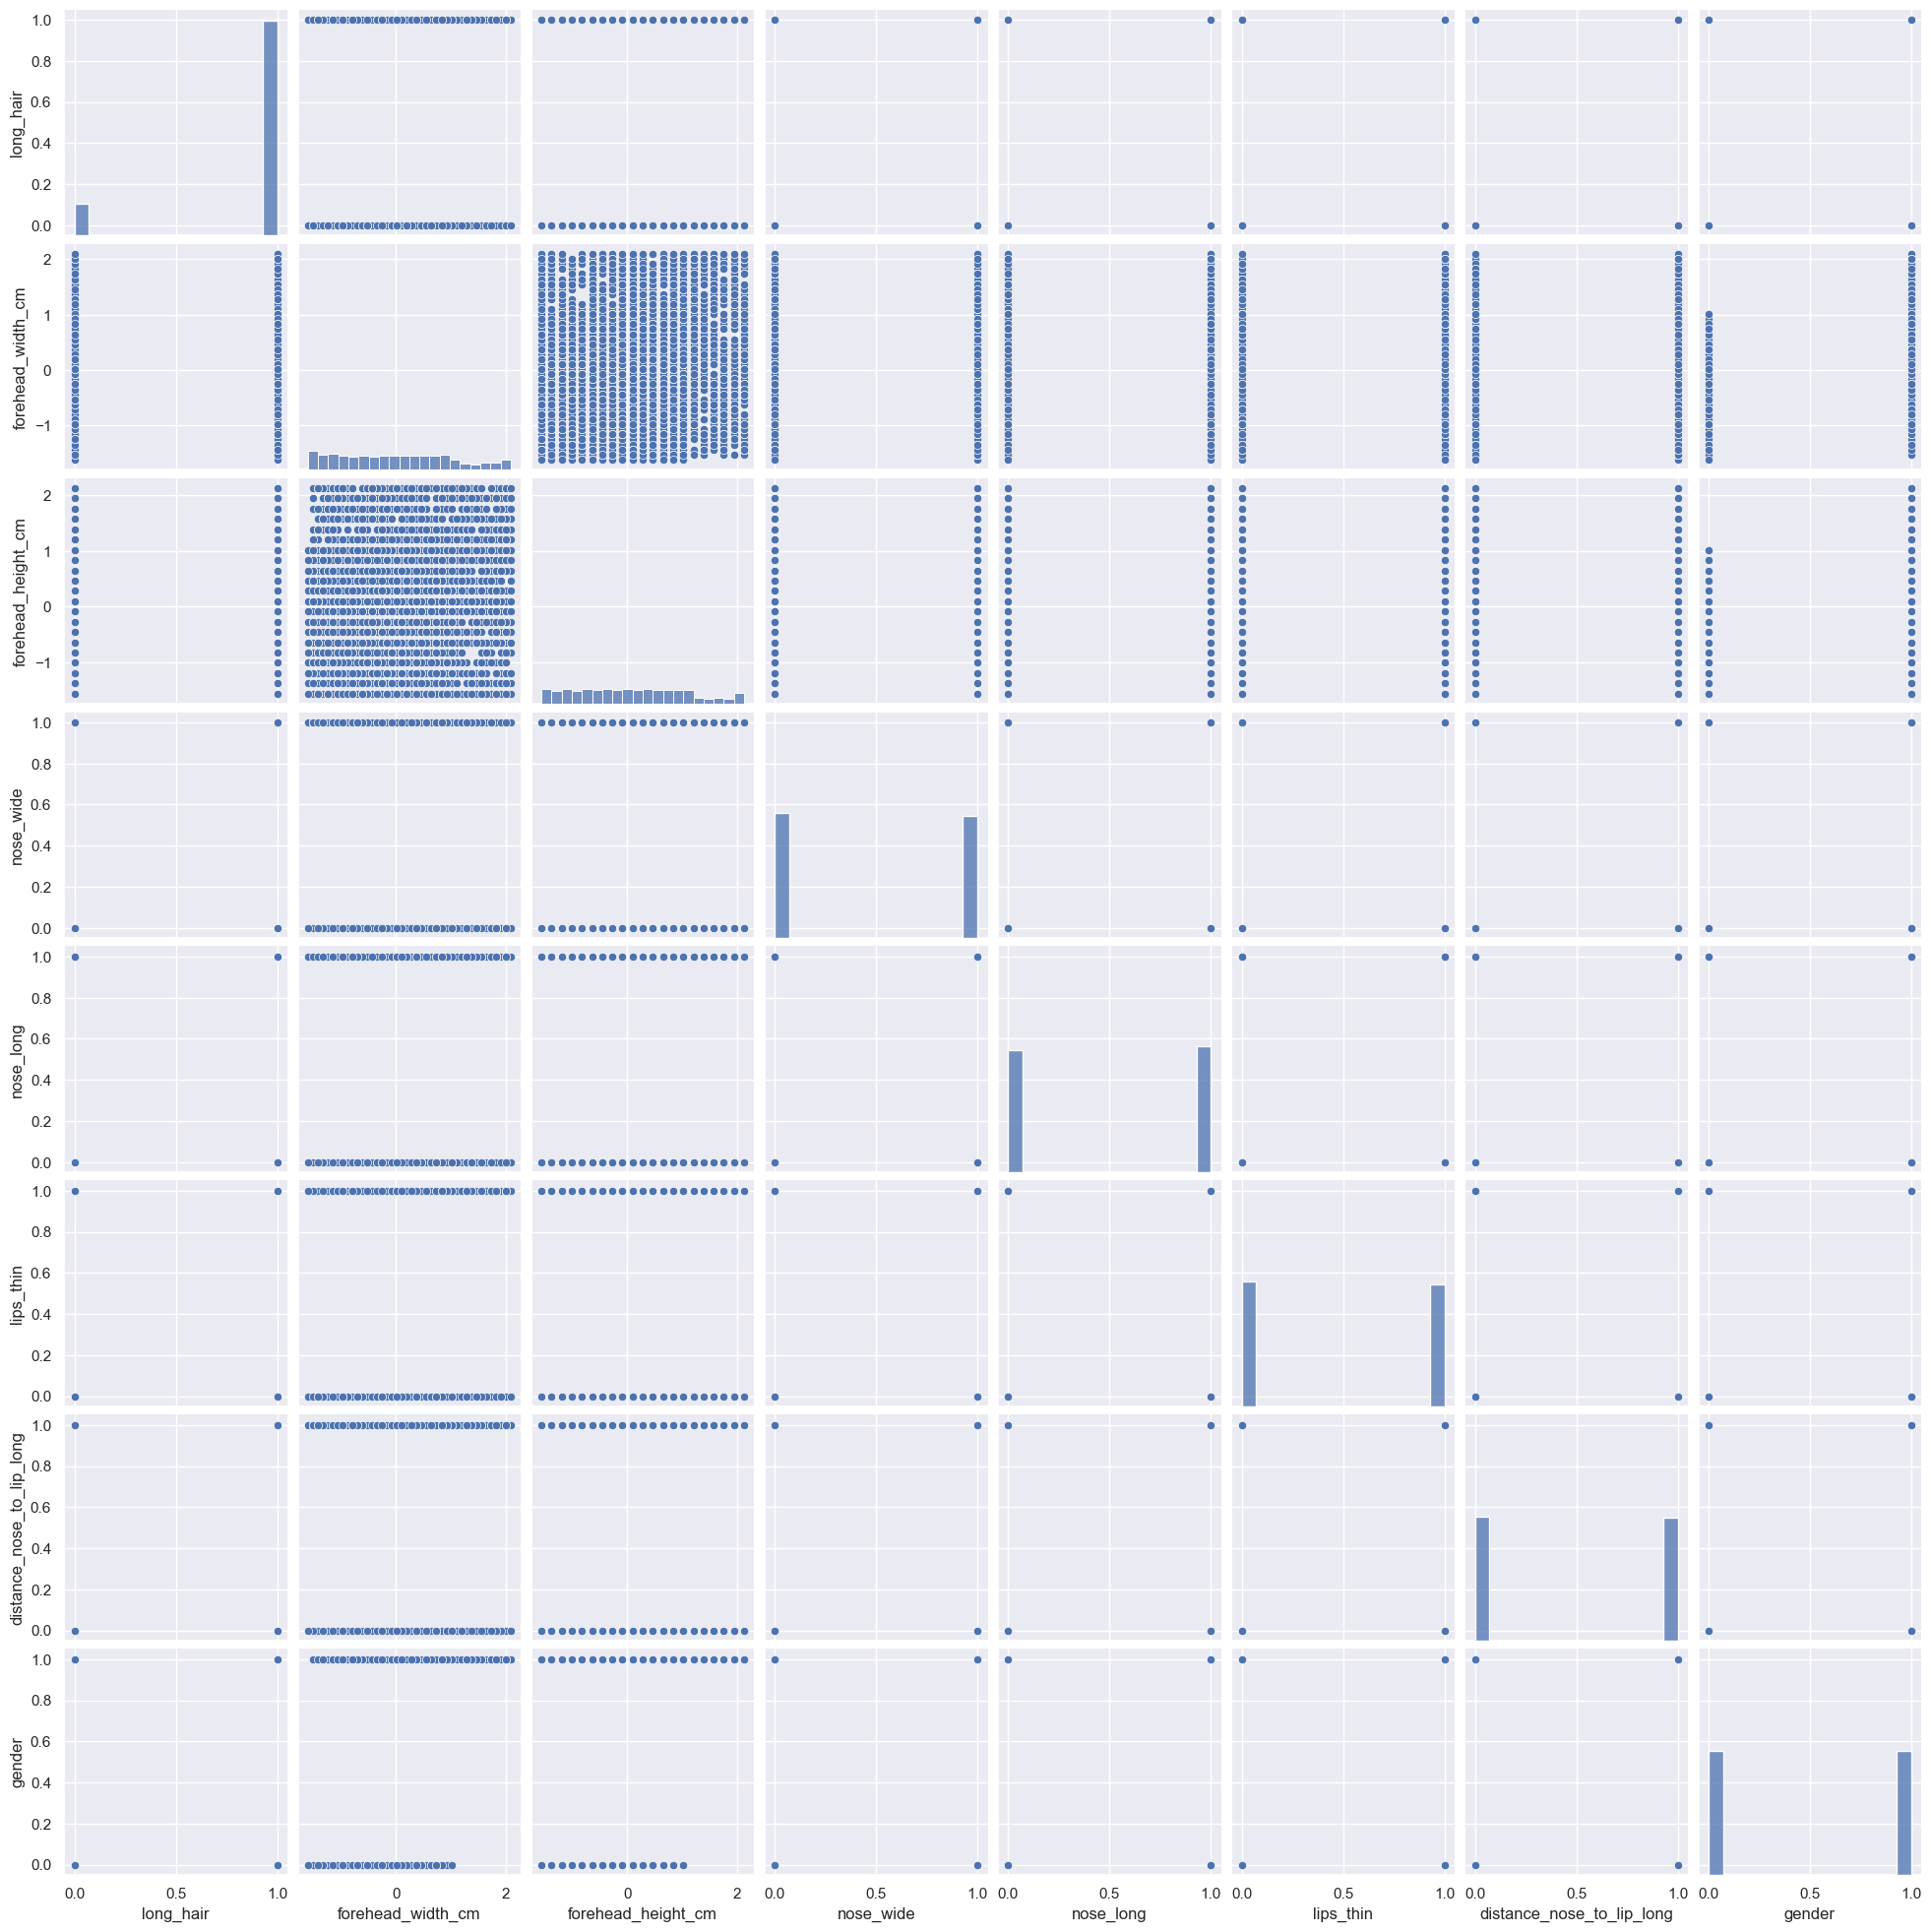

In [56]:
#pairplot
sns.set_style(style="darkgrid")
sns.pairplot(df)

c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maka\miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

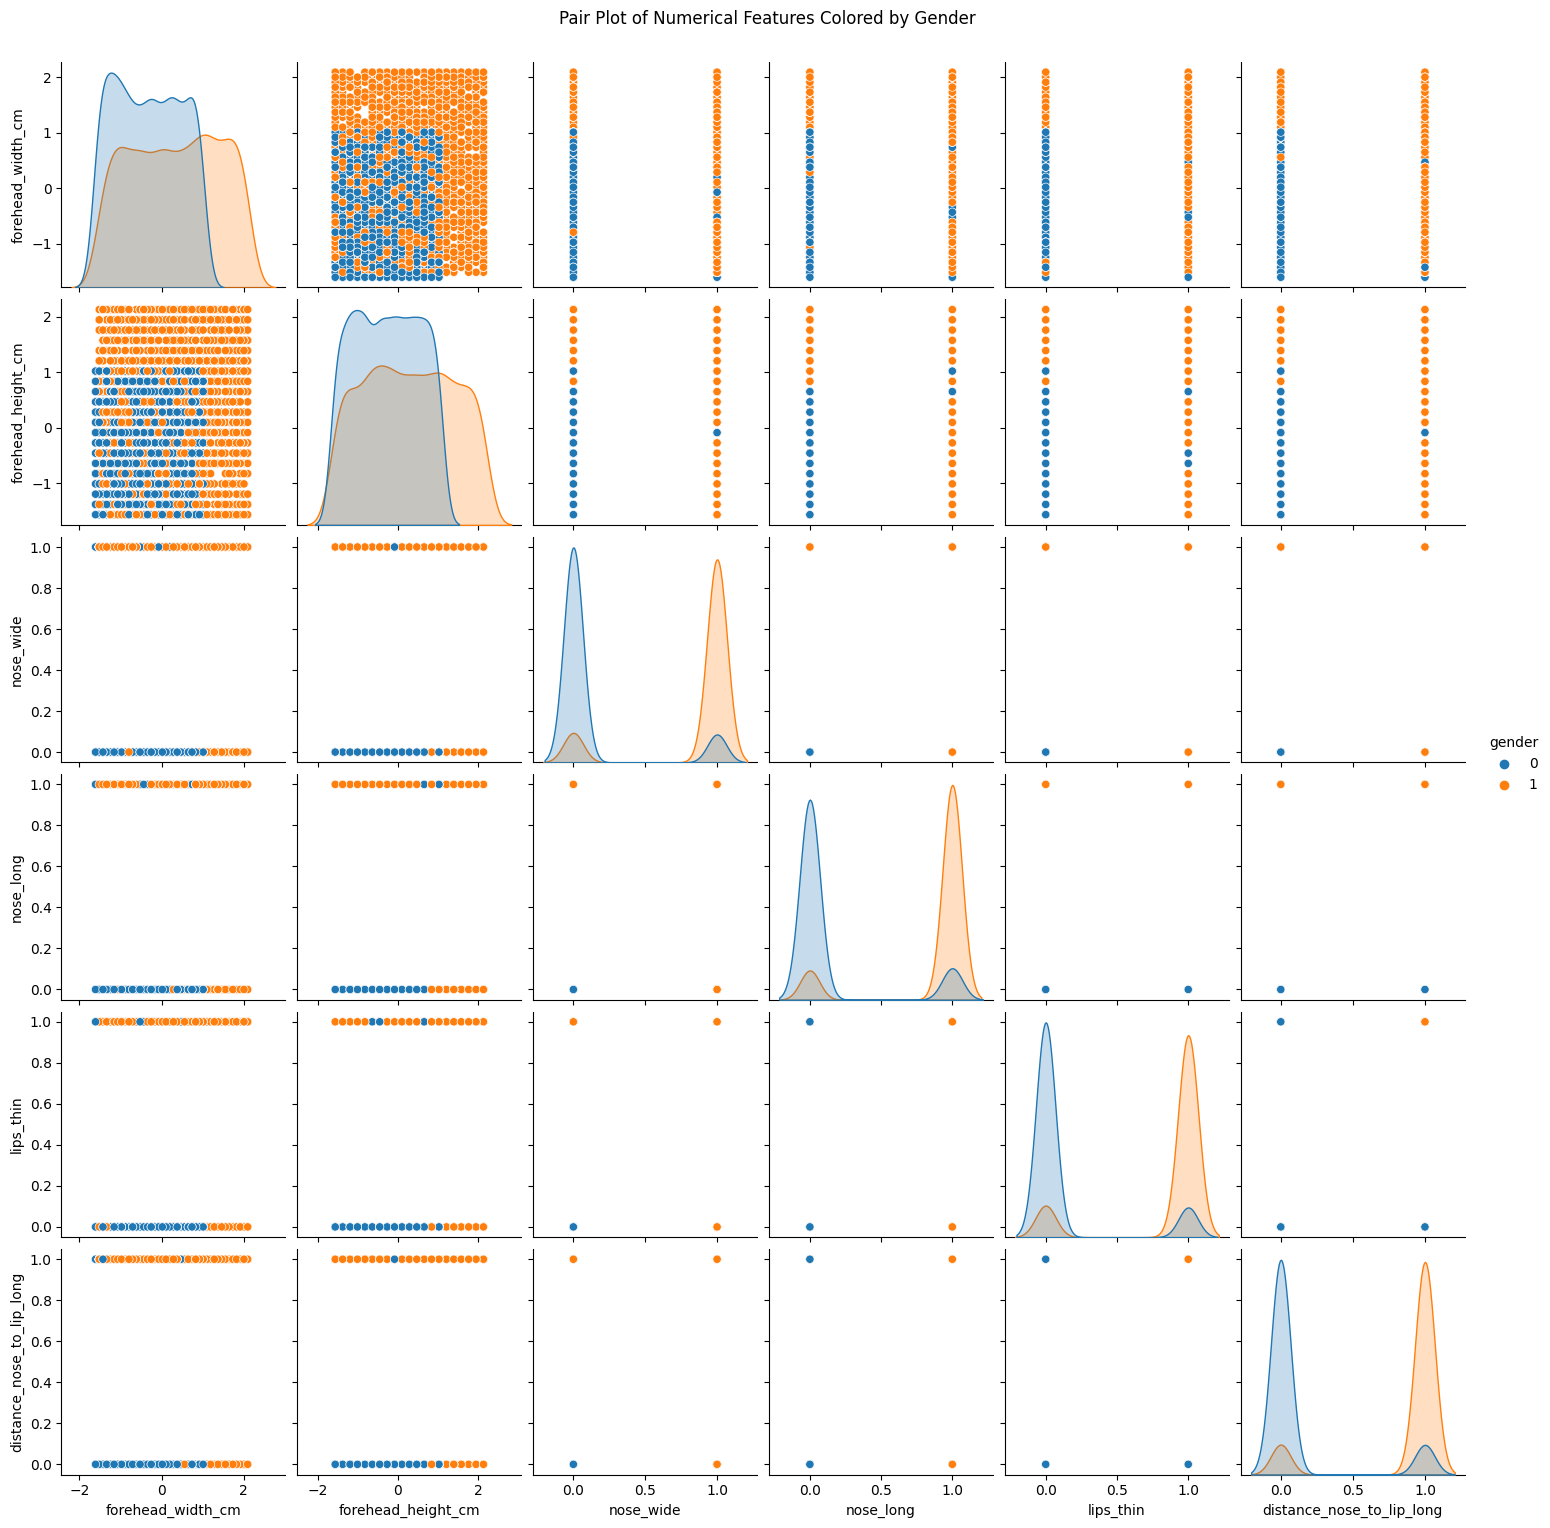

In [53]:
# Create a pair plot for numerical features, colored by gender
sns.pairplot(df, hue='gender', vars=['forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long'])
plt.suptitle('Pair Plot of Numerical Features Colored by Gender', y=1.02)
plt.show()

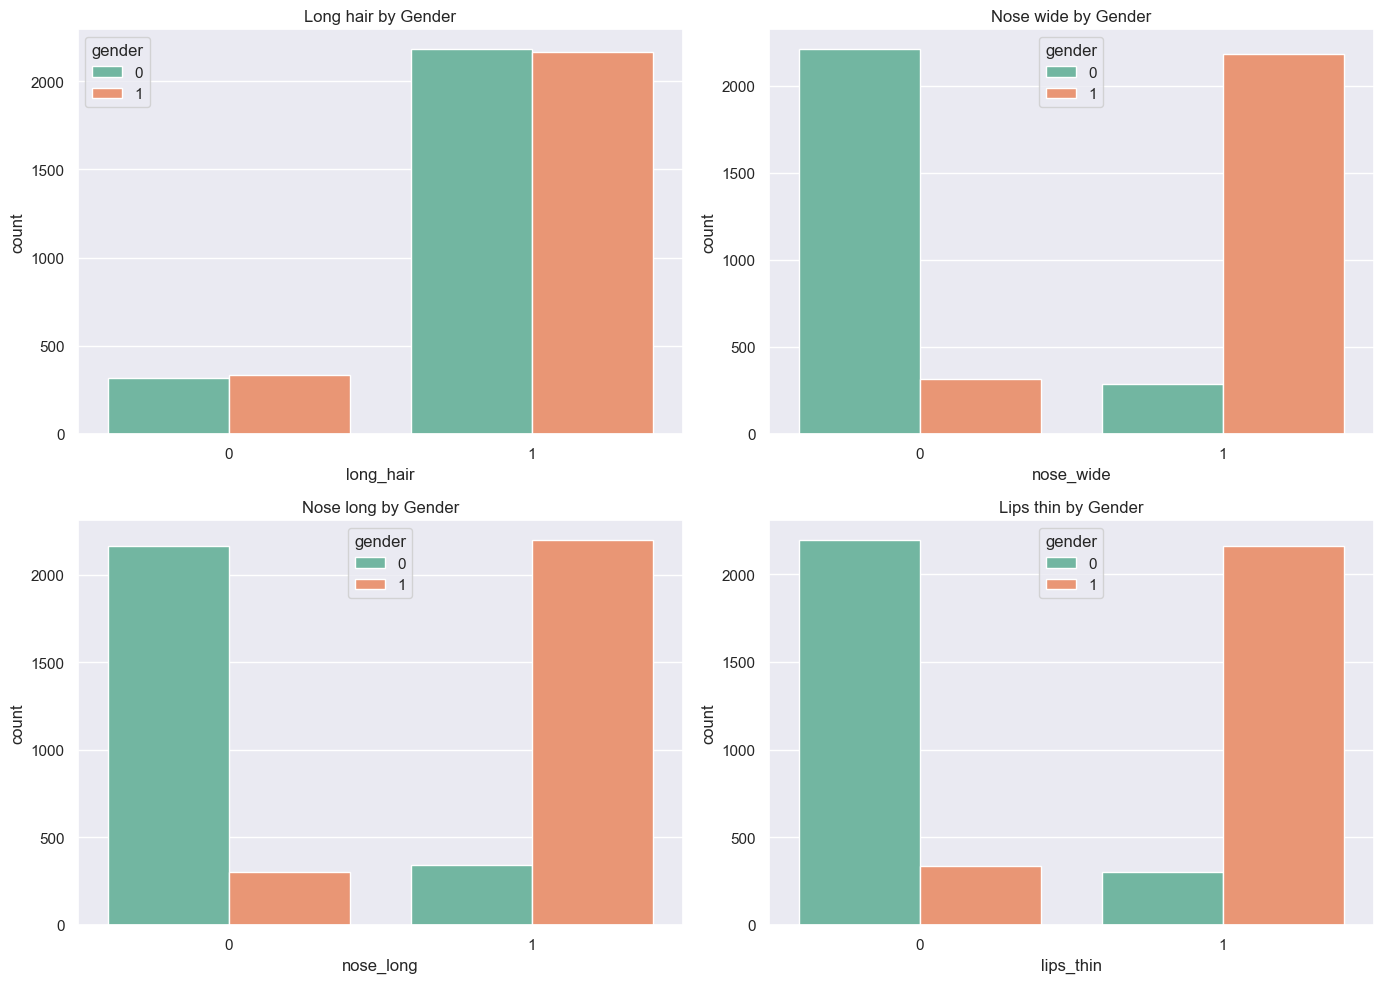

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

binary_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin']

for i, feature in enumerate(binary_features):
    sns.countplot(x=feature, hue='gender', data=df, ax=axes[i//2, i%2], palette='Set2')
    axes[i//2, i%2].set_title(f'{feature.replace("_", " ").capitalize()} by Gender')

plt.tight_layout()
plt.show()

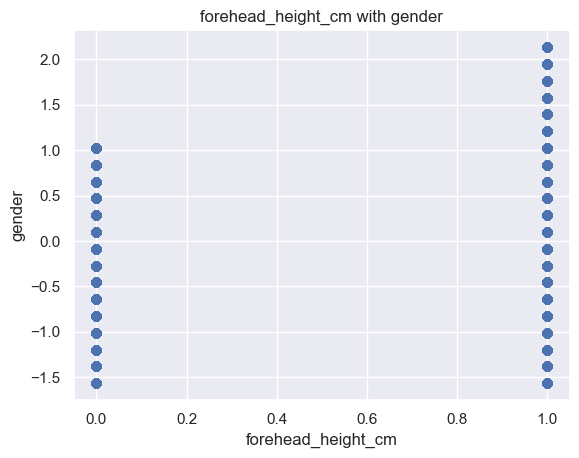

In [82]:
long_hair = df['forehead_height_cm']
gender = df['gender']
#plt.plot(gender , long_hair)
plt.scatter(gender , long_hair)
plt.title("forehead_height_cm with gender")
plt.xlabel("forehead_height_cm")
plt.ylabel("gender")
plt.xticks(rotation=0)
plt.show()